### Step 1: Reading the data

1. Import `pandas`.
2. Load [train.csv](./data/train.csv) as a `pandas` DataFrame.
3. In each of the following sections, copy the question as a python comment, then answer the question with your own code.
4. Refer to the [Titanic Kaggle competition](https://www.kaggle.com/c/titanic/data) if you need an explanation for any of the columns.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Split the data into training and testing sets

df = pd.read_csv('/Users/woodzsan/Desktop/Machine Learning and Data Analysis/Coding Temple/6 - Python For Data Analysis/Coding-Temple-M6-Lab-Titanic-Analysis/data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Step 2: Cleaning the data
Create a bar chart showing how many missing values are in each column.

Bonus : There's a good library for visualizing missing values called Missingno.

Which column has the most NaN values? How many cells in that column are empty?

<Axes: >

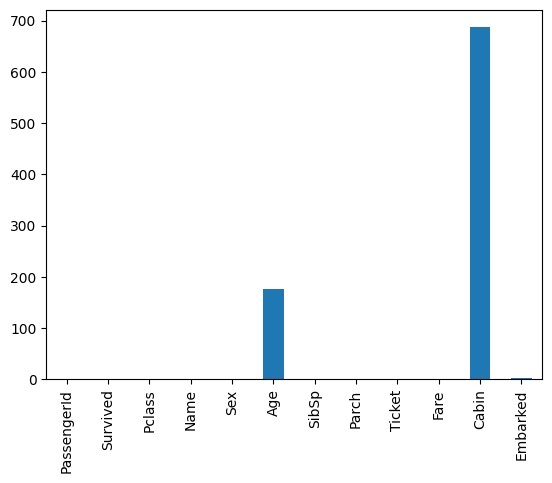

In [3]:
df_null = df.isnull().sum()
df_null.plot.bar(x='index', y='values')

#### Delete all rows where `Embarked` is empty.

In [4]:
df.dropna(subset=['Embarked'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


#### Fill all empty cabins with `¯\(ツ)/¯`

In [5]:
df['Cabin'] = df['Cabin'].fillna('¯\(ツ)/¯')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S


### Step 3: Feature extraction

There are two columns that pertain to how many family members are on the boat for a given person. 

Create a new column called FamilyCount which will be the sum of those two columns.

In [6]:
df['FamilyCount'] = df['SibSp'] + df['Parch']

Reverends have a special title in their name ('Rev.'). Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.

In [7]:
df['IsReverend'] = df['Name'].str.contains('Rev.').astype(int)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0


### Step 4: Exploratory analysis

df.groupby() may be very useful.

What was the survival rate overall?

In [9]:
df['Survived'].mean()

0.38245219347581555

Which gender fared the worst? What was their survival rate?

In [10]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

What was the survival rate for each Pclass?

In [11]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Did any reverends survive? How many?

In [12]:
df.groupby('IsReverend')['Survived'].mean()

IsReverend
0    0.385051
1    0.000000
Name: Survived, dtype: float64

What is the survival rate for cabins marked ¯\(ツ)/¯

In [13]:
df.groupby('Cabin')['Survived'].mean()

Cabin
A10        0.000000
A14        0.000000
A16        1.000000
A19        0.000000
A20        1.000000
             ...   
F38        0.000000
F4         1.000000
G6         0.500000
T          0.000000
¯\(ツ)/¯    0.299854
Name: Survived, Length: 147, dtype: float64

What is the survival rate for people whose Age is empty?


In [14]:
df_no_age = df[df['Age'].isnull()]  
df_no_age['Survived'].mean()

0.2937853107344633

What is the survival rate for each port of embarkation?

In [15]:
df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

What is the survival rate for children (under 12) in each Pclass?

In [16]:
df_under_12 = df[df['Age']<12.0]
df_under_12.groupby('Pclass')['Survived'].mean()

Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64

Did the captain of the ship survive? Is he on the list?


In [17]:
df[df['Name'].str.contains('Capt')]   

# Captain is on the list, but he did not survive.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,0


Of all the people that died, who had the most expensive ticket? How much did it cost?

In [22]:
df_no_survive = df[df['Survived'] == 0]
df_no_survive.loc[df_no_survive['Fare'].idxmax()]

PassengerId                                28
Survived                                    0
Pclass                                      1
Name           Fortune, Mr. Charles Alexander
Sex                                      male
Age                                      19.0
SibSp                                       3
Parch                                       2
Ticket                                  19950
Fare                                    263.0
Cabin                             C23 C25 C27
Embarked                                    S
FamilyCount                                 5
IsReverend                                  0
Name: 27, dtype: object

Does having family on the boat help or hurt your chances of survival?

In [19]:
df.groupby('FamilyCount')['Survived'].mean()    

FamilyCount
0     0.300935
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64